## Neural network example


In [110]:
import numpy as np
import matplotlib.pyplot as plt

p = int(2) #features
n = int(10000) #examples

## generate training data
X = np.random.rand(n,p)-0.5
Y1 = np.sign(np.sum(X**2,1)-.1).reshape((-1, 1))/2+.5
Y2 = np.sign(5*X[:,[0]]**3-X[:,[1]])/2+.5
Y = np.hstack((Y1, Y2))

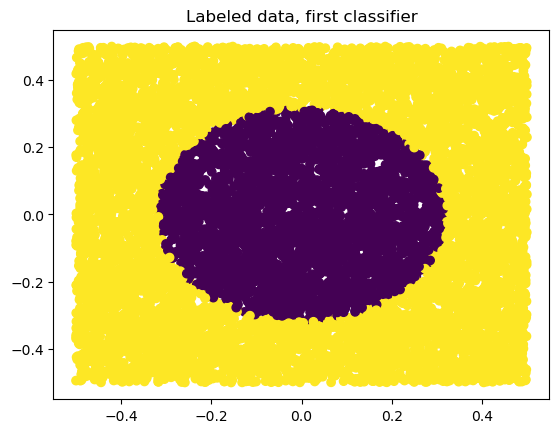

In [111]:
# Plot training data for first classification problem
plt.scatter(X[:,0], X[:,1], c=Y1.flatten())
plt.title('Labeled data, first classifier')
plt.show()

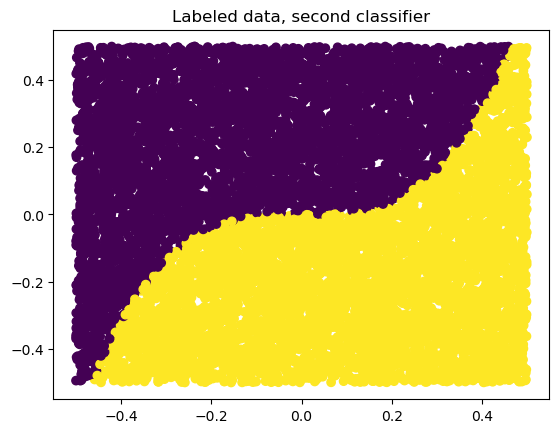

In [112]:
# Plot training data for second classification problem 
plt.scatter(X[:,0], X[:,1], c=Y2.flatten())
plt.title('Labeled data, second classifier')
plt.show()

In [114]:
## Train NN
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
# M = 2 #number of hidden nodes
# M = 3 
M = 4 

## initial weights
V = np.random.randn(M+1, q); 
W = np.random.randn(p+1, M);

alpha = 0.1 #step size
# L = 10 #number of epochs
L = 100

def logsig(_x):
    return 1/(1+np.exp(-_x))
        
for epoch in range(L):
    ind = np.random.permutation(n)
    for i in ind:
        # Forward-propagate
        H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
        Yhat = logsig(H@V)
         # Backpropagate
        delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
        Vnew = V-alpha*H.T@delta
        gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
        Wnew = W - alpha*Xb[[i],:].T@gamma
        V = Vnew
        W = Wnew
    print('epoch: ', epoch)

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44
epoch:  45
epoch:  46
epoch:  47
epoch:  48
epoch:  49
epoch:  50
epoch:  51
epoch:  52
epoch:  53
epoch:  54
epoch:  55
epoch:  56
epoch:  57
epoch:  58
epoch:  59
epoch:  60
epoch:  61
epoch:  62
epoch:  63
epoch:  64
epoch:  65
epoch:  66
epoch:  67
epoch:  68
epoch:  69
epoch:  70
epoch:  71
epoch:  72
epoch:  73
epoch:  74
epoch:  75
epoch:  76
epoch:  77
epoch:  78
epoch:  79
epoch:  80
epoch:  81
epoch:  82
epoch:  83
epoch:  84
epoch:  85
epoch:  86
epoch:  87
epoch:  88
epoch:  89
epoch:  90
epoch:  9

In [115]:
## Final predicted labels (on training data)
H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
Yhat = logsig(H@V)

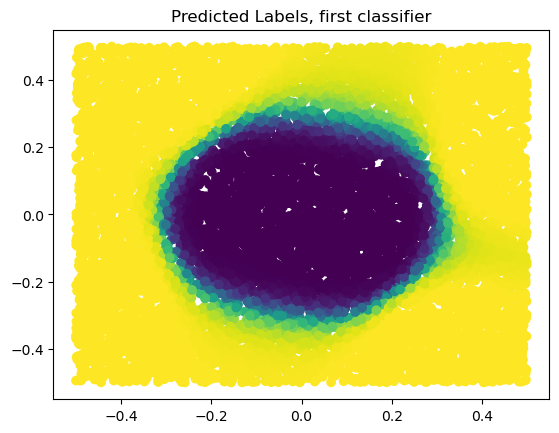

In [116]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,0])
plt.title('Predicted Labels, first classifier')
plt.show()

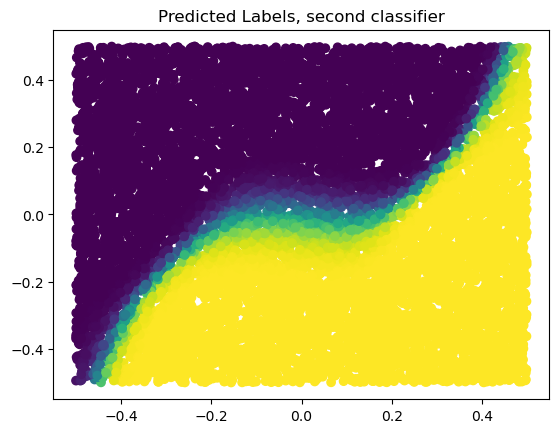

In [117]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,1])
plt.title('Predicted Labels, second classifier')
plt.show()

In [118]:
err_c1 = np.sum(abs(np.round(Yhat[:,0])-Y[:,0]))
print('Errors, first classifier:', err_c1)

err_c2 = np.sum(abs(np.round(Yhat[:,1])-Y[:,1]))
print('Errors, second classifier:', err_c2)

Errors, first classifier: 170.0
Errors, second classifier: 100.0


#### a) Use M = 2 hidden nodes and ten epochs in SGD. Run this four or ﬁve times and comment on the performance of the two classiﬁers and whether it varies from run to run.

1st time case1=2653.0, case2= 791.0

2nd time case1=2731.0, case2=776.0

3rd time case1=2899.0, case2=695.0

4th time case1=2935.0, case2=709.0

5th time case1=2918.0, case2=727.0

The performance changes because of the initial weights change.

#### b) Repeat M = 2 but use 100 epochs in SGD. Run this several times and comment on the performance of the classiﬁers and whether it varies from run to run.

1st time case1=2558.0, case2=737.0

2nd time case1=2731.0, case2=776.0

3rd time case1=2899.0, case2=695.0

The performance changes because of the initial weights change.

#### c) Recall the two-layer network results from the previous problem. How do the possible decision boundaries change when you add a hidden layer?

The decision boundaries 

#### d) Now use M = 3 hidden nodes and run 100 epochs of SGD (or as many as you can compute). Does going from two to three hidden nodes aﬀect classiﬁer performance?

The errors decrease a lot. (case1=435.0, case2=448.0)

#### e) Repeat the previous part for M = 4 hidden nodes and comment on classiﬁer performance.

The errors decrease a lot. (case1=170.0, case2=100.0)